100%|██████████| 2560/2560 [00:32<00:00, 78.24it/s, loss=-9.3061] 


Iteration 0, Loss: 5.548796653747559
Iteration 100, Loss: -6.604242324829102
Iteration 200, Loss: -7.421438217163086
Iteration 300, Loss: -7.88327693939209
Iteration 400, Loss: -8.16132926940918
Iteration 500, Loss: -8.322380065917969
Iteration 600, Loss: -8.442758560180664
Iteration 700, Loss: -8.552279472351074
Iteration 800, Loss: -8.658796310424805
Iteration 900, Loss: -8.73779582977295
Iteration 1000, Loss: -8.82163143157959
Iteration 1100, Loss: -8.888677597045898
Iteration 1200, Loss: -8.944772720336914
Iteration 1300, Loss: -8.985428810119629
Iteration 1400, Loss: -9.022415161132812
Iteration 1500, Loss: -9.059549331665039
Iteration 1600, Loss: -9.089077949523926
Iteration 1700, Loss: -9.121886253356934
Iteration 1800, Loss: -9.142066955566406
Iteration 1900, Loss: -9.163540840148926
Iteration 2000, Loss: -9.181386947631836
Iteration 2100, Loss: -9.210050582885742
Iteration 2200, Loss: -9.2362699508667
Iteration 2300, Loss: -9.26030445098877
Iteration 2400, Loss: -9.27883720397


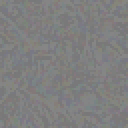
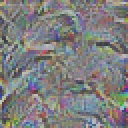
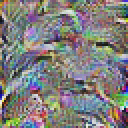
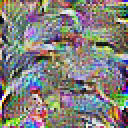
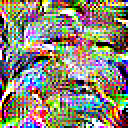
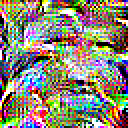

In [1]:
import render
from torch.optim import Adam
from show import show_result_html

IMAGE_SIZE = 64
DEVICE = 'cpu'
LEARNING_RATE = 0.05

image = render.ParameterizedImage(IMAGE_SIZE, sd=0.01).to(DEVICE)
optimizer = Adam(image.parameters(), lr=LEARNING_RATE)

images, thresholds = render.render_vis("inception4b:branch4:4", 
                                       optimizer, 
                                       image,
                                       device=DEVICE)

show_result_html(images, thresholds)

100%|██████████| 2560/2560 [00:37<00:00, 67.97it/s, loss=-2.9918]


Iteration 0, Loss: 5.8942461013793945
Iteration 100, Loss: -2.2890305519104004
Iteration 200, Loss: -2.516925573348999
Iteration 300, Loss: -2.617624282836914
Iteration 400, Loss: -2.6652321815490723
Iteration 500, Loss: -2.7775769233703613
Iteration 600, Loss: -2.8203225135803223
Iteration 700, Loss: -2.8610916137695312
Iteration 800, Loss: -2.8765785694122314
Iteration 900, Loss: -2.8851230144500732
Iteration 1000, Loss: -2.91445255279541
Iteration 1100, Loss: -2.9185760021209717
Iteration 1200, Loss: -2.921272039413452
Iteration 1300, Loss: -2.921645164489746
Iteration 1400, Loss: -2.9611589908599854
Iteration 1500, Loss: -2.9627647399902344
Iteration 1600, Loss: -2.9891653060913086
Iteration 1700, Loss: -2.96403169631958
Iteration 1800, Loss: -2.9654245376586914
Iteration 1900, Loss: -2.9868783950805664
Iteration 2000, Loss: -2.97648549079895
Iteration 2100, Loss: -2.9923954010009766
Iteration 2200, Loss: -2.9881339073181152
Iteration 2300, Loss: -3.0039143562316895
Iteration 2400,


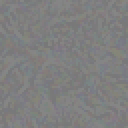
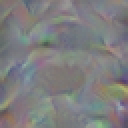
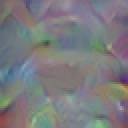
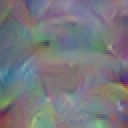
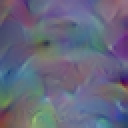
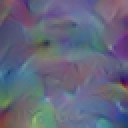

In [2]:
import regularization

L1_weight   = 0.05
TV_weight   = 0.25
Blur_weight = 0.01

image = render.ParameterizedImage(IMAGE_SIZE, sd=0.01).to(DEVICE)
optimizer = Adam(image.parameters(), lr=LEARNING_RATE)

regularizers = [
    regularization.add_regularizer(L1_weight, regularization.l1_reg),
    regularization.add_regularizer(TV_weight, regularization.total_variation),
    regularization.add_regularizer(Blur_weight, regularization.blur_reg),
]

images, thresholds = render.render_vis("inception4b:branch4:4",
                                       optimizer, 
                                       image,
                                       regularizers,
                                       device=DEVICE)
show_result_html(images, thresholds)